In [1]:
import numpy as np
import pandas as pd
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.visuz import cluster
#models
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.utils import resample


In [4]:
df= pd.read_csv('mcdonalds.csv')

In [5]:
print(df.columns)
print(df.shape)
print(df.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [10]:
# Read the CSV file into a DataFrame
df = pd.read_csv('mcdonalds.csv')  # Make sure the file is in the same directory as your script or provide the full path

# Taking first 11 columns
segmentation_columns = df.columns[:11]
MD_x = df[segmentation_columns]

# Converting "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculating and printing average values
average_values = MD_x.mean()
print(round(average_values, 2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [12]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('mcdonalds.csv')  # Ensure the file is in the same directory or provide the full path

# Taking first 11 columns
segmentation_columns = df.columns[:11]
MD_x = df[segmentation_columns]

# Converting "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculating and printing average values
average_values = MD_x.mean()
print(round(average_values, 2))


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [13]:
# Assuming MD_x is already defined as your processed data from previous steps

# PCA transformation
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Creating a DataFrame for principal components
MD_pca_df = pd.DataFrame(data=MD_pca, columns=[f'PC{i+1}' for i in range(MD_pca.shape[1])])

# Printing importance of components
print("\nImportance of Components:")
print(MD_pca_df)

# Additional information about explained variance ratio
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)


Importance of Components:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.425367 -0.219079  0.663255 -0.401300  0.201705 -0.389767 -0.211982   
1    -0.218638  0.388190 -0.730827 -0.094724  0.044669 -0.086596 -0.095877   
2     0.375415  0.730435 -0.122040  0.692262  0.839643 -0.687406  0.583112   
3    -0.172926 -0.352752 -0.843795  0.206998 -0.681415 -0.036133 -0.054284   
4     0.187057 -0.807610  0.028537  0.548332  0.854074 -0.097305 -0.457043   
...        ...       ...       ...       ...       ...       ...       ...   
1448  1.550242  0.275031 -0.013737  0.200604 -0.145063  0.306575 -0.075308   
1449 -0.957339  0.014308  0.303843  0.444350 -0.133690  0.381804 -0.326432   
1450 -0.185894  1.062662  0.220857 -0.467643 -0.187757 -0.192703 -0.091597   
1451 -1.182064 -0.038570  0.561561  0.701126  0.047645  0.193687 -0.027335   
1452  1.550242  0.275031 -0.013737  0.200604 -0.145063  0.306575 -0.075308   

           PC8       PC9      PC10  

In [16]:
# PCA transformation
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Rotation matrix (principal component loadings)
rotations = pca.components_.T
rotations_df = pd.DataFrame(rotations, columns=[f'PC{i+1}' for i in range(rotations.shape[1])], index=df.columns[:11])
rotations_df = rotations_df.round(1)

# Standard deviations of principal components
std_devs = np.sqrt(pca.explained_variance_).round(1)

# Printing results
print("Standard deviations (1, .., p=11):")
print(std_devs)
print("\nRotation matrix (11 x 11):")
print(rotations_df)


Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation matrix (11 x 11):
            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy      -0.5  0.4 -0.3  0.1 -0.3  0.2 -0.3  0.0  0.6  -0.1   0.0
convenient -0.2  0.0 -0.1 -0.1  0.3 -0.3 -0.1 -0.1 -0.0  -0.7  -0.5
spicy      -0.0  0.0 -0.0  0.2  0.1 -0.4  0.7  0.4  0.4  -0.1   0.1
fattening   0.1 -0.0 -0.3 -0.4 -0.1 -0.4 -0.4  0.6 -0.2  -0.0   0.3
greasy      0.3 -0.1 -0.8  0.3  0.4  0.2  0.0 -0.1 -0.0   0.0   0.0
fast       -0.1 -0.1 -0.1 -0.1  0.1 -0.6 -0.1 -0.6  0.2   0.2   0.3
cheap      -0.3 -0.6 -0.1  0.1 -0.1 -0.1 -0.0  0.1  0.1   0.4  -0.5
tasty      -0.5  0.3 -0.3 -0.0 -0.2 -0.1  0.4 -0.1 -0.6   0.1   0.0
expensive   0.3  0.6  0.0  0.1 -0.0 -0.3 -0.1  0.0  0.1   0.5  -0.5
healthy    -0.2  0.1  0.2  0.8  0.3 -0.2 -0.3  0.2 -0.2  -0.0   0.2
disgusting  0.4 -0.1 -0.1  0.4 -0.7 -0.2 -0.0 -0.2 -0.1  -0.3  -0.0


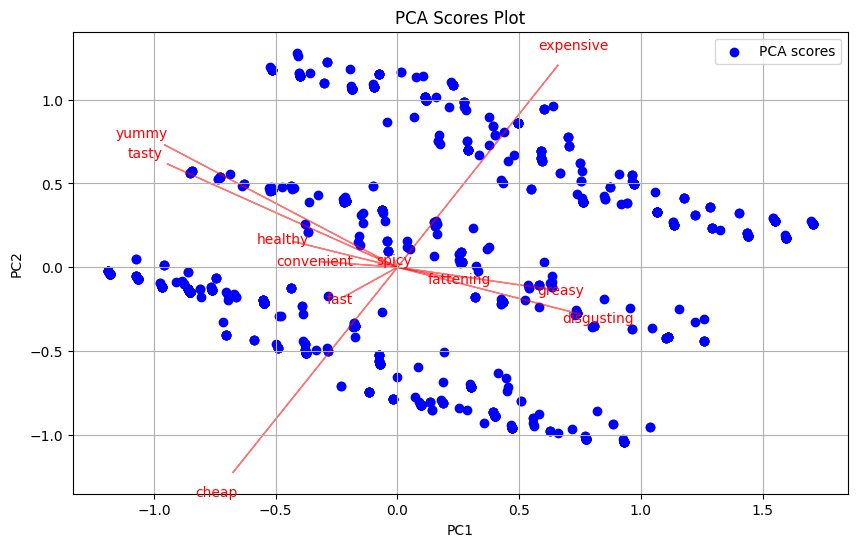

In [18]:
import matplotlib.pyplot as plt

# Scatter plot of PCA scores with a different color
plt.figure(figsize=(10, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='blue', label='PCA scores')  # Change color here
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scores Plot')

# Function to plot projection arrows for principal components
def plot_proj_axes(rotations, labels):
    for i, label in enumerate(labels):
        plt.arrow(0, 0, rotations[i, 0]*2, rotations[i, 1]*2, color='r', alpha=0.5)
        plt.text(rotations[i, 0]*2.2, rotations[i, 1]*2.2, label, color='r', ha='center', va='center')

# Get feature names
feature_names = df.columns[:11]

# Plot projection axes (principal component loadings)
plot_proj_axes(rotations[:, :2], feature_names)

# Additional plot configurations
plt.legend()
plt.grid()
plt.show()


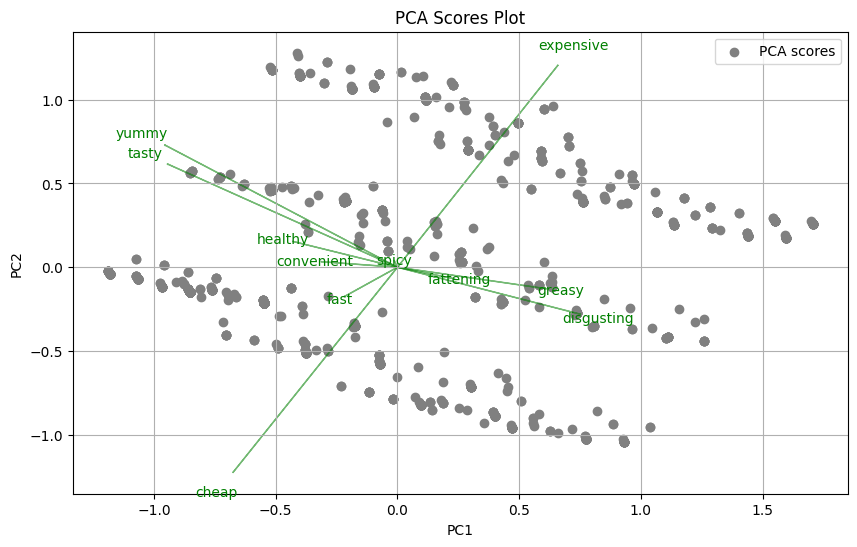

In [19]:
import matplotlib.pyplot as plt

# Scatter plot of PCA scores with a different color
plt.figure(figsize=(10, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey', label='PCA scores')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scores Plot')

# Function to plot projection arrows for principal components
def plot_proj_axes(rotations, labels):
    for i, label in enumerate(labels):
        plt.arrow(0, 0, rotations[i, 0]*2, rotations[i, 1]*2, color='green', alpha=0.5)  # Change color here
        plt.text(rotations[i, 0]*2.2, rotations[i, 1]*2.2, label, color='green', ha='center', va='center')  # Change color here

# Get feature names
feature_names = df.columns[:11]

# Plot projection axes (principal component loadings)
plot_proj_axes(rotations[:, :2], feature_names)

# Additional plot configurations
plt.legend()
plt.grid()
plt.show()


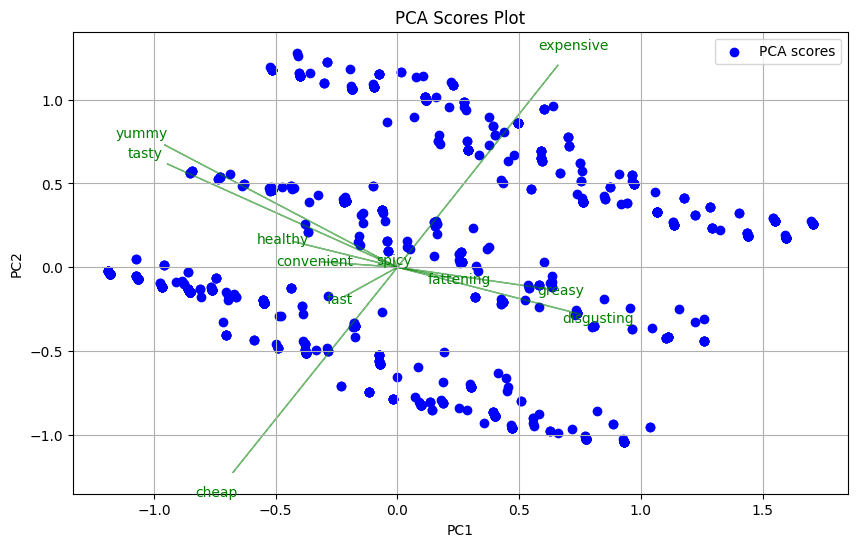

In [20]:
import matplotlib.pyplot as plt

# Scatter plot of PCA scores with clusters in blue
plt.figure(figsize=(10, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='blue', label='PCA scores')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scores Plot')

# Function to plot projection arrows for principal components
def plot_proj_axes(rotations, labels):
    for i, label in enumerate(labels):
        plt.arrow(0, 0, rotations[i, 0]*2, rotations[i, 1]*2, color='green', alpha=0.5)  # Green arrows
        plt.text(rotations[i, 0]*2.2, rotations[i, 1]*2.2, label, color='green', ha='center', va='center')  # Green labels

# Get feature names
feature_names = df.columns[:11]

# Plot projection axes (principal component loadings)
plot_proj_axes(rotations[:, :2], feature_names)

# Additional plot configurations
plt.legend()
plt.grid()
plt.show()


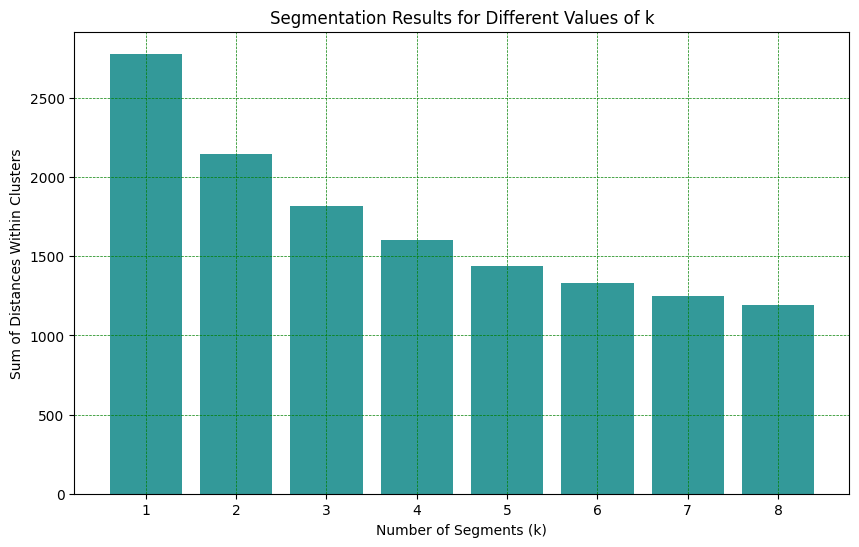

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(1234)

# Number of repetitions
nrep = 10

# Range of number of clusters (segments)
num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

# Iterate over each value of k
for k in num_segments:
    # Create KMeans instance
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    
    # Fit KMeans to the data
    kmeans.fit(MD_x)
    
    # Append sum of squared distances of samples to their closest cluster center
    within_cluster_distances.append((kmeans.inertia_))
    
    # Store KMeans model for each k
    MD_km28[str(k)] = kmeans
    
# Plotting the results
plt.figure(figsize=(10, 6))
bars = plt.bar(num_segments, within_cluster_distances, align='center', alpha=0.8, color='teal')
plt.xlabel("Number of Segments (k)")
plt.ylabel("Sum of Distances Within Clusters")
plt.title("Segmentation Results for Different Values of k")
plt.grid(True, color='green', linestyle='--', linewidth=0.5)
plt.xticks(num_segments)
plt.show()


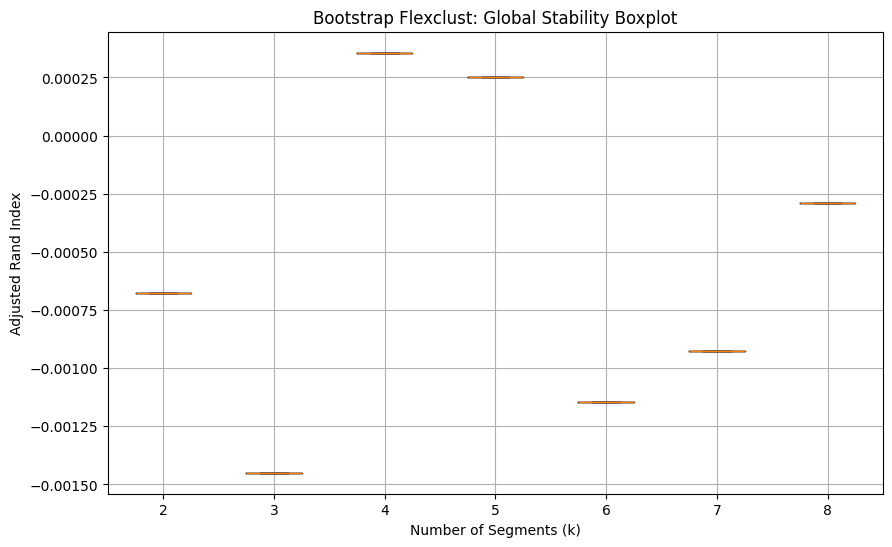

In [24]:
np.random.seed(1234)

n_bootstraps = 100  # Number of bootstrap samples
n_repeats = 10      # Number of KMeans repetitions

# Generate bootstrap samples
bootstrap_samples = []
for _ in range(n_bootstraps):
    bootstrap_sample = resample(MD_x.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

# Initialize a list to store adjusted Rand index scores
adjusted_rand_indices = []

# Range of number of segments (clusters)
num_segments = range(2, 9)

# Iterate over each value of k
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        # Fit KMeans on the bootstrap sample
        kmeans = KMeans(n_clusters=k, n_init=n_repeats, random_state=1234)
        kmeans.fit(bootstrap_sample)
        
        # Predict clusters and compute adjusted Rand index
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD_x.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        
        # Store stability score
        stability_scores.append(stability_score)
    
    # Append stability scores for the current k to the main list
    adjusted_rand_indices.append(stability_scores)

# Transpose the adjusted_rand_indices list for plotting
adjusted_rand_indices = np.array(adjusted_rand_indices).T

# Plotting the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(adjusted_rand_indices, labels=list(num_segments), whis=10)
plt.xlabel("Number of Segments (k)")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust: Global Stability Boxplot")
plt.grid(True)
plt.show()

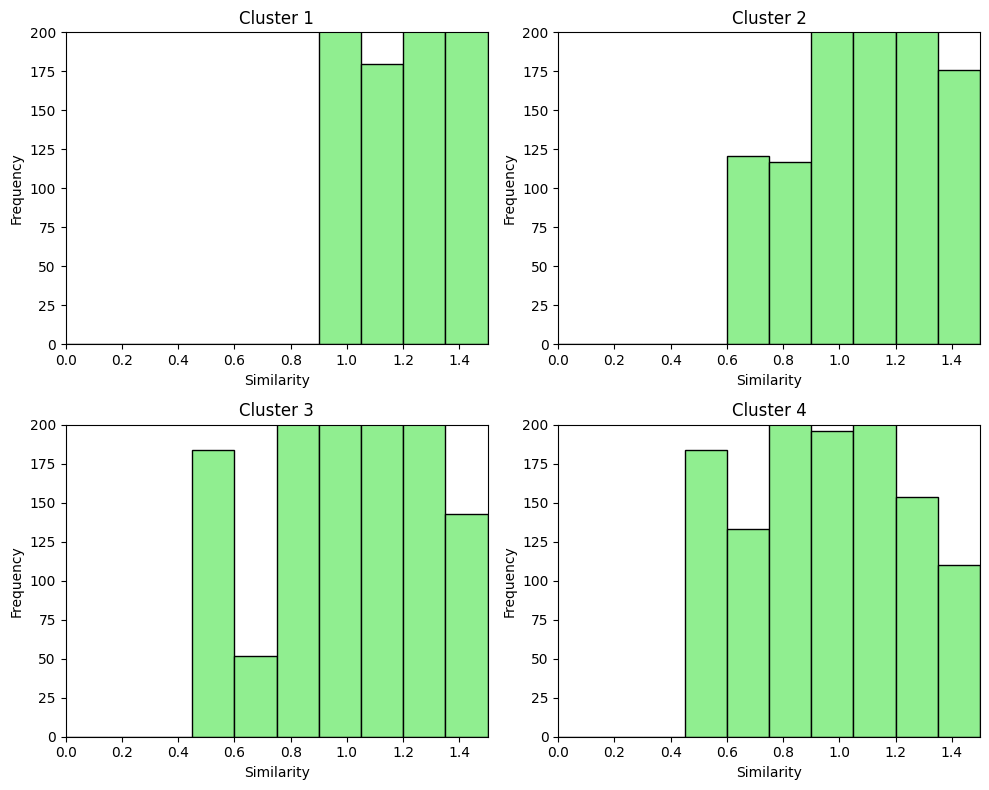

In [28]:
range_values = (0, 1.5)  # Adjusted range for similarity values
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Adjusted figure size for better layout

for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD_x)
    similarities = MD_km28[str(i)].transform(MD_x).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values, color='lightgreen', edgecolor='black')  # Changed histogram color to 'lightgreen' and added edgecolor
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Cluster {i}')  # Changed format string for title

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    axs[row, col].set_xticks(np.arange(0, 1.6, 0.2))  # Adjusted x ticks for better readability

plt.tight_layout()
plt.show()


C:\Users\sayan\AppData\Local\Temp\ipykernel_13776\901968461.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(num_segments))  # Using a colormap for better differentiation of lines


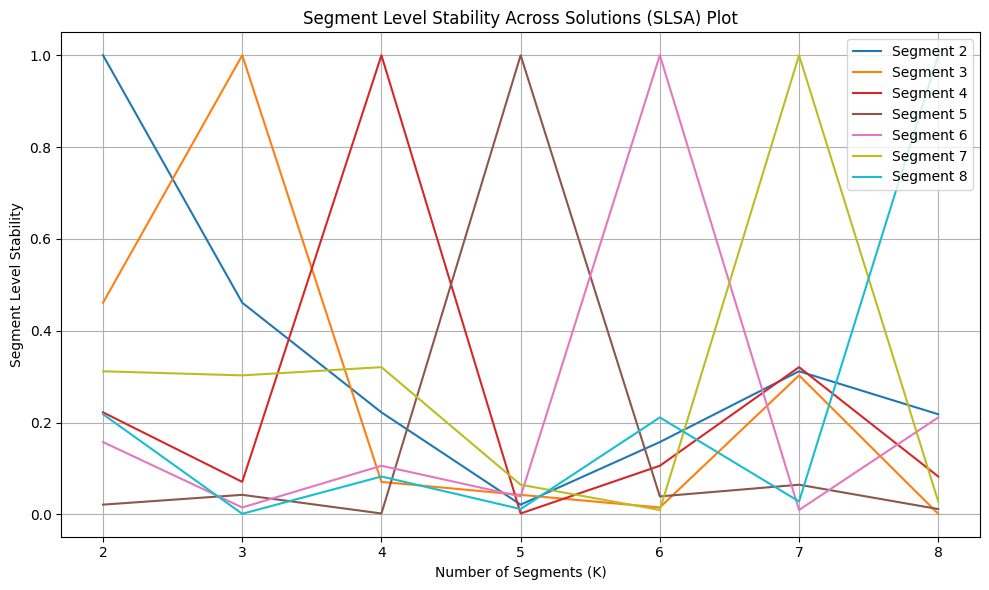

In [29]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)
    
plt.figure(figsize=(10, 6))  # Adjusted figure size for better visibility

colors = plt.cm.get_cmap('tab10', len(num_segments))  # Using a colormap for better differentiation of lines

for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], 
             label=f'Segment {segment}', color=colors(i))

plt.xlabel('Number of Segments (K)')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)  # Adding grid lines for clarity
plt.tight_layout()
plt.show()


In [32]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)
    
segment_labels
segment_similarities

{'2': array([1.18700649, 1.03060963, 1.83763118, ..., 1.12682984, 1.27986291,
        1.28015113]),
 '3': array([1.18819649, 1.05436747, 1.50713439, ..., 0.7453038 , 1.14333643,
        1.31518757]),
 '4': array([1.2474978 , 1.04053309, 1.53455564, ..., 0.7163022 , 1.08795365,
        0.92313062]),
 '5': array([1.24359844, 0.96719367, 1.58115844, ..., 0.61802246, 0.97175595,
        0.92616889])}

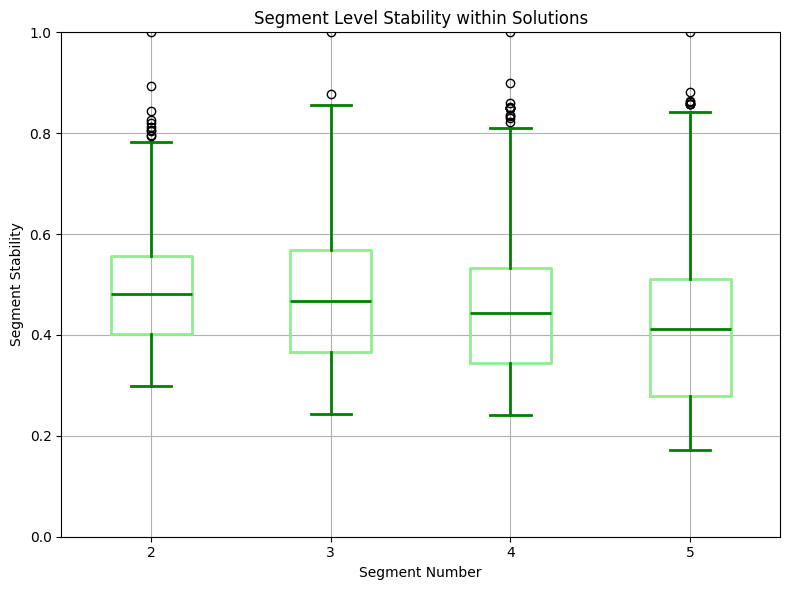

In [33]:
segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization

# Customize boxplot with light green color
boxprops = dict(color='lightgreen', linewidth=2)
medianprops = dict(color='green', linewidth=2)
whiskerprops = dict(color='green', linewidth=2)
capprops = dict(color='green', linewidth=2)

plt.boxplot(segment_stability_values, whis=1.5, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.grid(True)  # Adding grid lines for better readability
plt.tight_layout()
plt.show()


In [36]:


np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

MD_m28_df = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])
print(MD_m28_df)


   iter  converged  k  k0       logLik          AIC          BIC          ICL
0    10       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     9       True  4   4 -1603.913802  3215.827604  3236.953147  3235.627738
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662


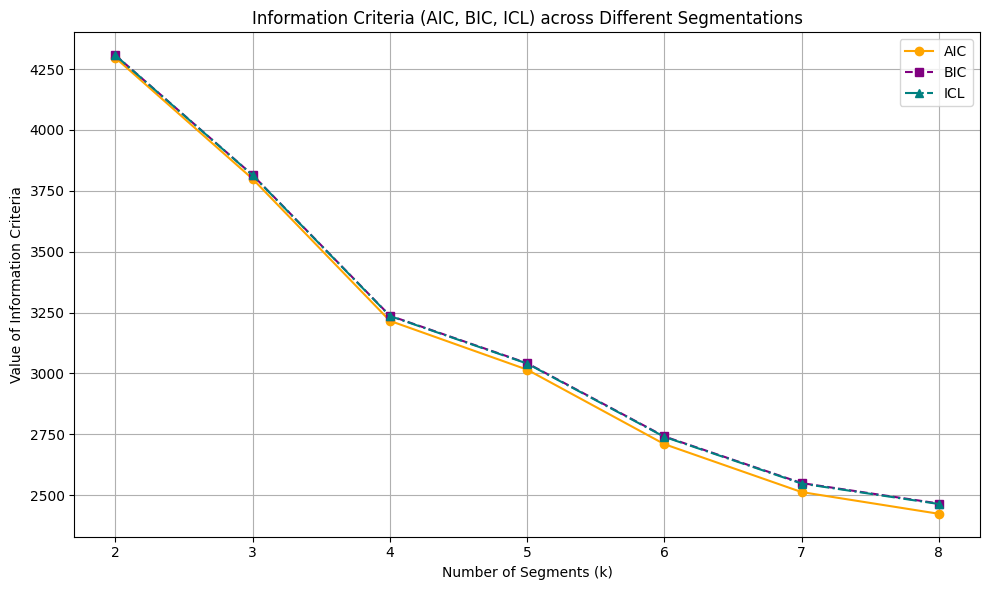

In [38]:
num_segments = MD_m28_df["k"]
AIC_values = MD_m28_df["AIC"]
BIC_values = MD_m28_df["BIC"]
ICL_values = MD_m28_df["ICL"]

plt.figure(figsize=(10, 6))

plt.plot(num_segments, AIC_values, marker='o', linestyle='-', label='AIC', color='orange')
plt.plot(num_segments, BIC_values, marker='s', linestyle='--', label='BIC', color='purple')
plt.plot(num_segments, ICL_values, marker='^', linestyle='-.', label='ICL', color='teal')

plt.xlabel('Number of Segments (k)')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL) across Different Segmentations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
from sklearn.mixture import GaussianMixture

k = 4

# Using KMeans
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

# Using Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

# Creating results DataFrame
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Filtering MD_x based on GMM cluster 3
MD_m4 = MD_x[results['mixture'] == 3]

# Applying KMeans to filtered MD_x
k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

# Creating results_m4 DataFrame for filtered results
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

# Printing cross tabulation
print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))


mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256
kmeans   0   1   2   3
kmeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


In [42]:
from sklearn.mixture import GaussianMixture

# Fit GMM for MD.m4a
gmm_m4a = GaussianMixture(n_components=4, random_state=1234)
gmm_m4a.fit(MD_x)
log_likelihood_m4a = gmm_m4a.score(MD_x)

# Fit another GMM for MD.m4
gmm_m4 = GaussianMixture(n_components=4, random_state=1234)
gmm_m4.fit(MD_x)
log_likelihood_m4 = gmm_m4.score(MD_x)

# Print log-likelihoods
print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)


Log-likelihood for MD.m4a: 9.456781748071885
Log-likelihood for MD.m4: 9.456781748071885


In [44]:
reversed_table = df['Like'].value_counts().sort_index(ascending=False)

print("Reversed table:")
print(reversed_table)
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

# Map 'Like' values to numerical values and store in 'Like.n' column
df['Like.n'] = df['Like'].map(like_mapping)

# Invert the scale so that higher numbers indicate more positive sentiment
df['Like.n'] = 6 - df['Like.n']

# Count frequencies of each numerical value in 'Like.n' column
like_n_counts = df['Like.n'].value_counts().sort_index()

print(like_n_counts)



Reversed table:
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64
Like.n
1     143
2     160
3     229
4     187
5     152
6     169
7      58
8      59
9      73
10     71
11    152
Name: count, dtype: int64


In [46]:
from patsy import dmatrices

# Assuming 'Like' is the dependent variable and the first 11 columns are independent variables
independent_vars = df.columns[0:11]
formula_str = 'Like ~ ' + ' + '.join(independent_vars)

y, X = dmatrices(formula_str, data=df, return_type='dataframe')

print(X)


      Intercept  yummy[T.Yes]  convenient[T.Yes]  spicy[T.Yes]  \
0           1.0           0.0                1.0           0.0   
1           1.0           1.0                1.0           0.0   
2           1.0           0.0                1.0           1.0   
3           1.0           1.0                1.0           0.0   
4           1.0           0.0                1.0           0.0   
...         ...           ...                ...           ...   
1448        1.0           0.0                1.0           0.0   
1449        1.0           1.0                1.0           0.0   
1450        1.0           1.0                1.0           0.0   
1451        1.0           1.0                1.0           0.0   
1452        1.0           0.0                1.0           0.0   

      fattening[T.Yes]  greasy[T.Yes]  fast[T.Yes]  cheap[T.Yes]  \
0                  1.0            0.0          1.0           1.0   
1                  1.0            1.0          1.0           1.0   
2  

In [49]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
import numpy as np

np.random.seed(1234)

# Assuming you have already defined 'independent_vars' and 'df' as per previous discussions

# Create design matrix X using dmatrix
X = dmatrix('1 + ' + ' + '.join(independent_vars), data=df)

# Number of components for Gaussian Mixture Model
n_components = 2

# Initialize and fit Gaussian Mixture Model
model = GaussianMixture(n_components=n_components, random_state=1234)
model.fit(X)

# Predict cluster labels
cluster_labels = model.predict(X)

# Print model summary (not really applicable for Gaussian Mixture in sklearn)
print(model)

# Calculate and print cluster sizes
cluster_sizes = np.bincount(cluster_labels)
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i}: {size}")




GaussianMixture(n_components=2, random_state=1234)
Cluster sizes:
Cluster 0: 545
Cluster 1: 908


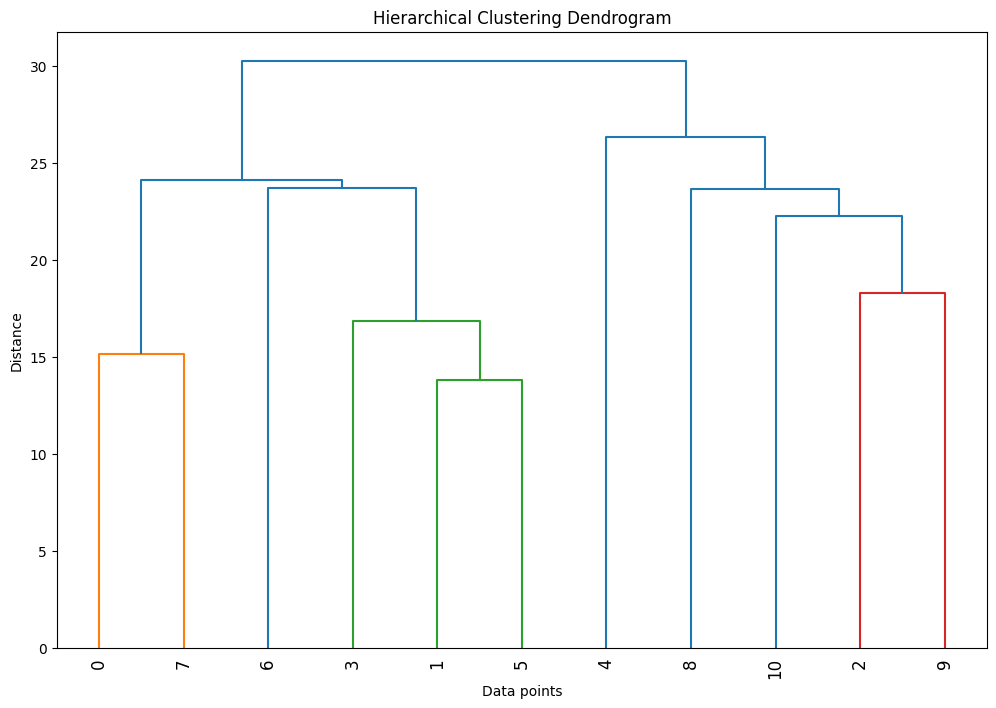

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming MD_x is your data matrix
D = pdist(np.transpose(MD_x))  # Calculate pairwise distances
Z = linkage(D, method='average')  # Perform hierarchical/agglomerative clustering

# Plotting dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=90, leaf_font_size=12, show_contracted=True)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


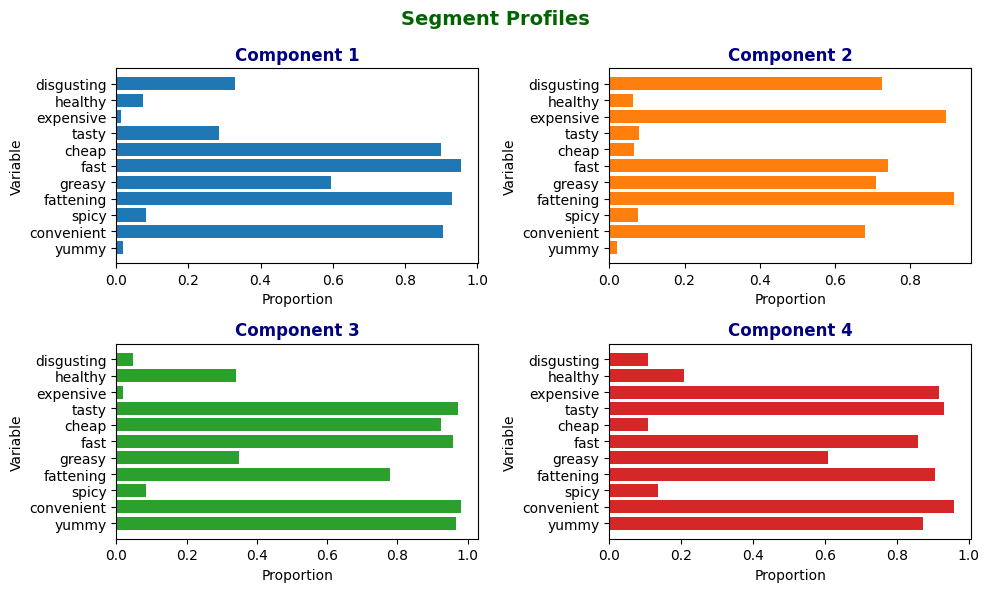

In [53]:
import matplotlib.pyplot as plt

# Assuming MD_km28['4'] contains the KMeans model for 4 clusters

kmeans = MD_km28['4']
labels = kmeans.labels_

# Calculate mean values for each cluster
MD_mean = MD_x.groupby(labels).mean()

# Define colors for bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Example colors: blue, orange, green, red

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for i in range(4):
    ax = axs[i // 2, i % 2]
    ax.barh(range(MD_mean.shape[1]), MD_mean.iloc[i], color=colors[i])
    ax.set_title(f'Component {i + 1}', fontsize=12, fontweight='bold', color='navy')
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns, fontsize=10)

fig.suptitle('Segment Profiles', fontsize=14, fontweight='bold', color='darkgreen')
fig.tight_layout()

plt.show()


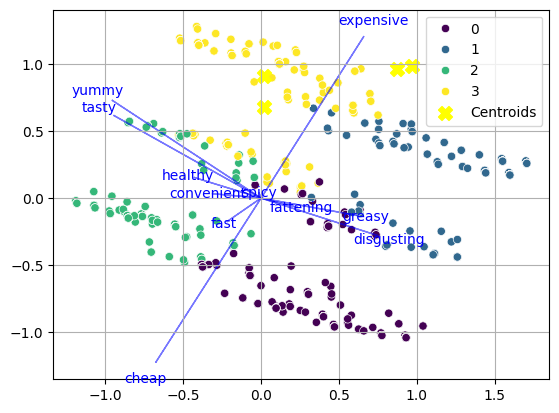

In [54]:


# Plotting the PCA scores with clusters and centroids
sns.scatterplot(data=df, x=MD_pca[:, 0], y=MD_pca[:, 1], hue=kmeans.labels_, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker="X", c="yellow", s=100, label="Centroids")  # Changed centroid color to yellow

# Function to plot projection axes
def plot_proj_axes(rotations, labels):
    for i, label in enumerate(labels):
        plt.arrow(0, 0, rotations[i, 0]*2, rotations[i, 1]*2, color='blue', alpha=0.5)  # Changed arrow color to blue
        plt.text(rotations[i, 0]*2.2, rotations[i, 1]*2.2, label, color='blue', ha='center', va='center')  # Changed text color to blue

feature_names = df.columns[:11]
plot_proj_axes(rotations[:, :2], feature_names)

plt.legend()
plt.grid(True)
plt.show()


In [58]:
# segment description
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder

df1= pd.read_csv('mcdonalds.csv')

def labelling(x):
    df1[x] = LabelEncoder().fit_transform(df1[x])
    return df1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df_eleven = df1.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df1['cluster_num'] = kmeans.labels_ 
crosstab =pd.crosstab(df1['cluster_num'],df1['Like'])
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,3
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,1
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,3
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,1
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,3


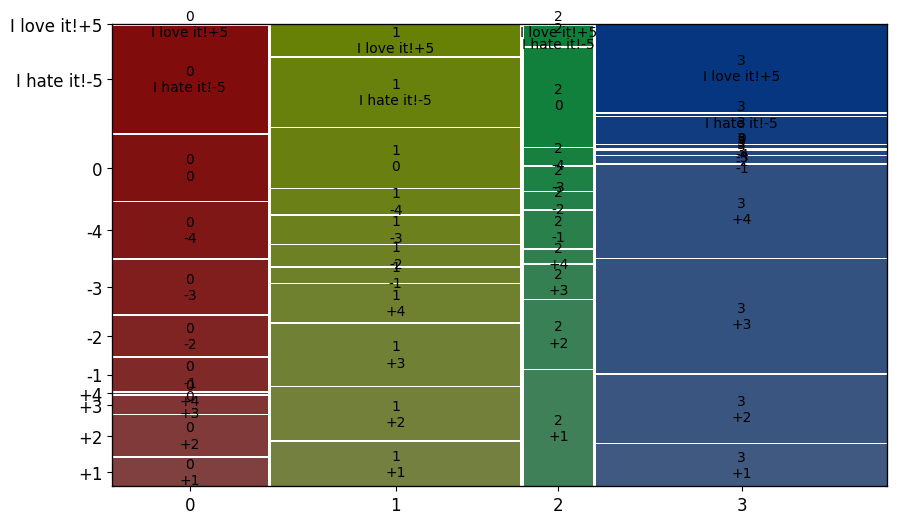

In [61]:
plt.rcParams['figure.figsize'] = (10,6)
mosaic(crosstab.stack())
plt.show()

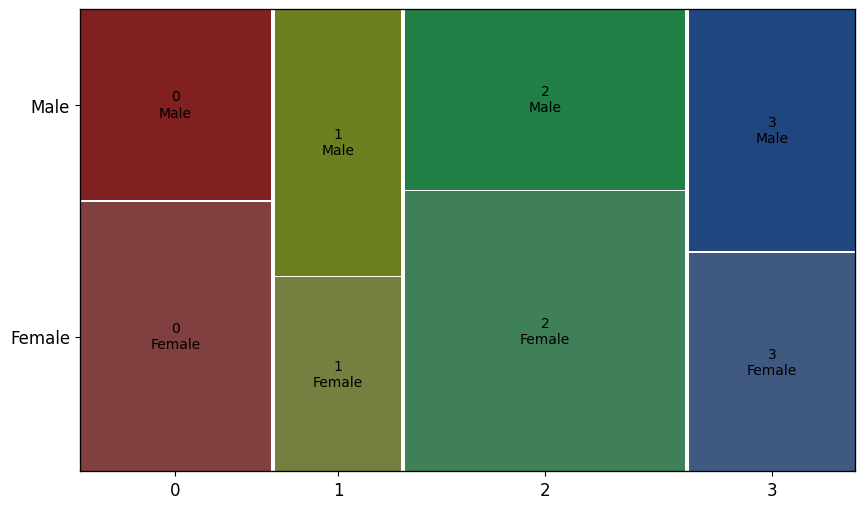

In [62]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, df['Gender'])
ct
mosaic(ct.stack(),gap=0.005)
plt.show()

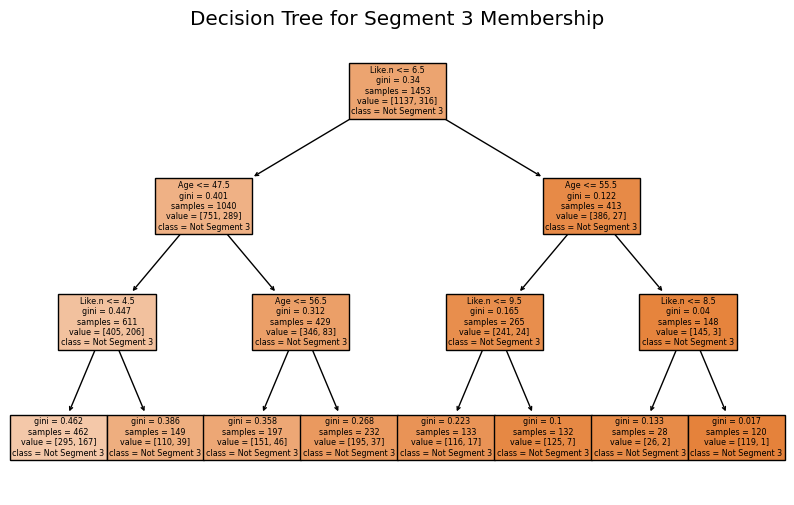

In [63]:
# membership plot
from sklearn.tree import DecisionTreeClassifier, plot_tree


X = df[['Like.n', 'Age']]  
y = (k4==3).astype(int)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.title("Decision Tree for Segment 3 Membership")
plt.show()

In [64]:
df1['VisitFrequency'] = LabelEncoder().fit_transform(df1['VisitFrequency'])
visit = df1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit
df1['Like'] = LabelEncoder().fit_transform(df1['Like'])
Like = df1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
Gender = df1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


In [65]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.432432,5.888514,2.787162
1,1,0.547569,4.957717,2.596195
2,2,0.427481,3.694656,2.618321
3,3,0.401447,3.915009,2.598553


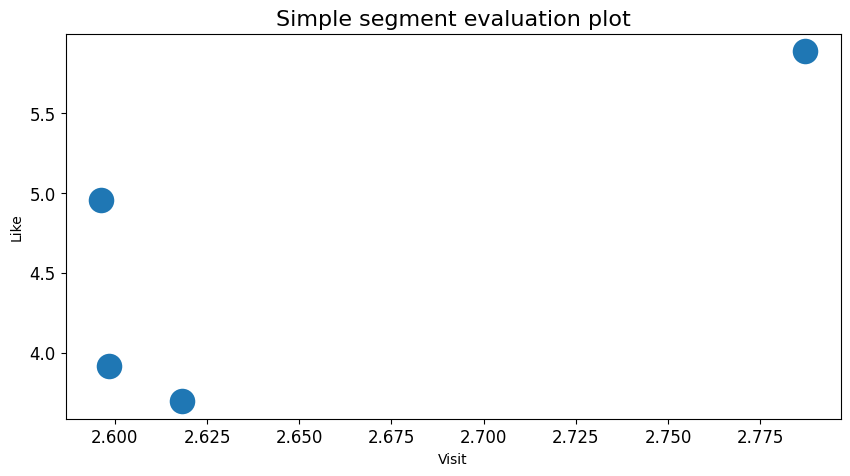

In [66]:
# segment evalutaion
plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400)
plt.title("Simple segment evaluation plot",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()